# Door Status Classification for Edge AI

This project demonstrates the development of a Convolutional Neural Network (CNN) model for real-time classification of "door open" and "door closed" states from image data. The primary objective is to create an efficient and accurate model suitable for deployment on resource-constrained edge devices, such as the SEEED XIAO microcontroller.

The workflow encompasses the entire machine learning pipeline, from data preparation and model training to evaluation and conversion for edge deployment. Key aspects covered include:

*   **Data Loading and Preprocessing**: Handling of a small, custom image dataset.
*   **Model Architecture**: Design of a simple yet effective CNN for binary classification.
*   **Training and Evaluation**: Monitoring model performance using accuracy, classification reports, and confusion matrices.
*   **Feature Visualization**: Understanding the internal workings of the CNN by visualizing learned features.
*   **TensorFlow Lite Conversion**: Optimizing the model for efficient execution on microcontrollers.

This project serves as a practical example for implementing computer vision solutions on embedded systems, emphasizing a clean, end-to-end approach tailored for edge AI applications.

In [1]:
import os

# 1. Initialize empty lists
image_paths = []
labels = []

# Define image classes and their corresponding labels
class_mapping = {
    'door_closed': 0,
    'door_open': 1
}

# 2. Iterate through files in the /content/ directory
for filename in os.listdir('/content/'):
    file_path = os.path.join('/content/', filename)

    # Check if it's a file and an image file type
    if os.path.isfile(file_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Check for 'door_closed' or 'door_open' in the filename
        if 'door_closed' in filename.lower():
            image_paths.append(file_path)
            labels.append(class_mapping['door_closed'])
        elif 'door_open' in filename.lower():
            image_paths.append(file_path)
            labels.append(class_mapping['door_open'])

# 3. Print the total count of images loaded
print(f"Total images loaded: {len(image_paths)}")

# Calculate counts for each class for verification
closed_count = labels.count(class_mapping['door_closed'])
open_count = labels.count(class_mapping['door_open'])
print(f"'door_closed' images found: {closed_count}")
print(f"'door_open' images found: {open_count}")

print("Image paths and labels created successfully.")

Total images loaded: 200
'door_closed' images found: 100
'door_open' images found: 100
Image paths and labels created successfully.


## Visualize Representative Images

### Subtask:
Display one representative image for each label ('door_closed' and 'door_open') from the raw dataset to visually understand their characteristics. Ensure images are displayed in a format that fits the screen well.


**Reasoning**:
To visually inspect representative images for each class, I need to import image processing and plotting libraries, identify an image for each label from the pre-loaded paths and labels, then load and display them using subplots.



Visualizing representative images...
Loaded 'door_closed' image: /content/door_closed20251118_094909.jpg
Loaded 'door_open' image: /content/door_open20251118_093813.jpg


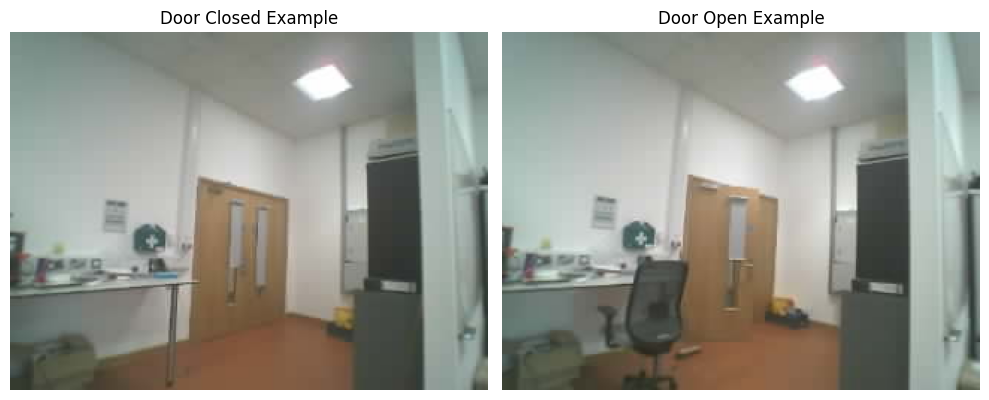

Representative images displayed successfully.


In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

print("Visualizing representative images...")

# Select the first image path for 'door_closed' (label 0)
closed_image_path = None
open_image_path = None

for i, label in enumerate(labels):
    if label == class_mapping['door_closed'] and closed_image_path is None:
        closed_image_path = image_paths[i]
    if label == class_mapping['door_open'] and open_image_path is None:
        open_image_path = image_paths[i]

    if closed_image_path is not None and open_image_path is not None:
        break

# Load both selected images
if closed_image_path:
    closed_image = Image.open(closed_image_path)
    print(f"Loaded 'door_closed' image: {closed_image_path}")
else:
    print("No 'door_closed' images found.")

if open_image_path:
    open_image = Image.open(open_image_path)
    print(f"Loaded 'door_open' image: {open_image_path}")
else:
    print("No 'door_open' images found.")


# Create a figure with two subplots
plt.figure(figsize=(10, 5))

# Display the 'door_closed' image
if closed_image_path:
    plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
    plt.imshow(closed_image)
    plt.title('Door Closed Example')
    plt.axis('off')

# Display the 'door_open' image
if open_image_path:
    plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
    plt.imshow(open_image)
    plt.title('Door Open Example')
    plt.axis('off')

plt.tight_layout()
plt.show()

print("Representative images displayed successfully.")

## Preprocess Data

### Subtask:
Resize all images to a consistent dimension of 96x96 pixels. Normalize pixel values to the 0-1 range. Convert the lists of images and labels into NumPy arrays. Finally, split the dataset into training and validation sets (e.g., 80% training, 20% validation). This ensures consistent input for the model and prepares the data for training.


**Reasoning**:
To preprocess the data, I will import the necessary libraries, resize and normalize the images, convert them and labels into NumPy arrays, and then split the data into training and validation sets as instructed.



In [3]:
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

print("Starting image preprocessing...")

# 2. Initialize an empty list for processed images
processed_images = []

# 3. Loop through each image_path
for i, image_path in enumerate(image_paths):
    # 4. Open each image
    img = Image.open(image_path)
    # 5. Resize the image to 96x96 pixels
    img = img.resize((96, 96))
    # 6. Convert to NumPy array and normalize pixel values
    img_array = np.array(img)
    # Ensure the image has 3 channels (RGB) for consistency
    if len(img_array.shape) == 2: # Grayscale image
        img_array = np.stack([img_array, img_array, img_array], axis=-1)
    elif img_array.shape[2] == 4: # RGBA image
        img_array = img_array[:, :, :3] # Discard alpha channel

    normalized_img_array = img_array / 255.0
    processed_images.append(normalized_img_array)

# 7. Convert the processed_images list and the labels list into NumPy arrays
X = np.array(processed_images)
y = np.array(labels, dtype=np.float32).reshape(-1, 1)

print("Images processed and converted to NumPy arrays.")

# 8. Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

print("Dataset split into training and validation sets.")

# 9. Print the shapes of the resulting arrays
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

print("Data preprocessing complete.")

Starting image preprocessing...
Images processed and converted to NumPy arrays.
Dataset split into training and validation sets.
X_train shape: (160, 96, 96, 3)
y_train shape: (160, 1)
X_val shape: (40, 96, 96, 3)
y_val shape: (40, 1)
Data preprocessing complete.


## Build CNN Model

### Subtask:
Define a simple Convolutional Neural Network (CNN) architecture with `Conv2D`, `MaxPooling2D`, `Flatten`, and `Dense` layers, designed for binary classification with an input shape of 96x96x3, and then print the model summary.


**Reasoning**:
I need to define a Convolutional Neural Network (CNN) architecture as per the subtask's instructions. This involves importing necessary Keras modules, building a Sequential model with specified layers, and then printing the model summary.



In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# 2. Initialize a Sequential model
model = Sequential([
    # 3. Add an Input layer explicitly as recommended
    Input(shape=(96, 96, 3)),
    # 4. Add a Conv2D layer
    Conv2D(32, (3, 3), activation='relu'),
    # 5. Add a MaxPooling2D layer
    MaxPooling2D((2, 2)),
    # 6. Add another Conv2D layer
    Conv2D(64, (3, 3), activation='relu'),
    # 7. Add another MaxPooling2D layer
    MaxPooling2D((2, 2)),
    # 8. Flatten the output
    Flatten(),
    # 9. Add a Dense layer with 'relu' activation
    Dense(128, activation='relu'),
    # 10. Add the final Dense output layer with 'sigmoid' activation
    Dense(1, activation='sigmoid')
])

# 11. Print the model summary
print("CNN Model Summary:")
model.summary()

print("CNN model defined and summary printed successfully.")

CNN Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 94, 94, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,984,577 (15.20 MB)

 Trainable params: 3,984,577 (15.20 MB)

 Non-trainable params: 0 (0.00 B)

CNN model defined and summary printed successfully.


## Train CNN Model

### Subtask:
Compile the CNN model using the Adam optimizer and binary cross-entropy loss. Train the model on the preprocessed training data for a suitable number of epochs, using the validation set to monitor performance. No data augmentation will be applied in this step. The training history will be captured.


**Reasoning**:
The subtask requires compiling the CNN model with specified optimizer, loss, and metrics, then training it using the preprocessed training and validation data for a suitable number of epochs, capturing the training history.



In [5]:
print("Compiling the CNN model...")
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
print("Model compiled successfully.")

print("\nTraining the CNN model...")
EPOCHS = 20
history = model.fit(X_train, y_train,
                    epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    verbose=1)
print("Model training complete. Training history captured.")

Compiling the CNN model...
Model compiled successfully.

Training the CNN model...
Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 574ms/step - accuracy: 0.4208 - loss: 1.3843 - val_accuracy: 0.5000 - val_loss: 1.1286
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 440ms/step - accuracy: 0.4986 - loss: 0.8951 - val_accuracy: 0.5000 - val_loss: 0.6847
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 426ms/step - accuracy: 0.5020 - loss: 0.6867 - val_accuracy: 0.5500 - val_loss: 0.6726
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 465ms/step - accuracy: 0.6845 - loss: 0.6728 - val_accuracy: 0.7750 - val_loss: 0.6435
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 684ms/step - accuracy: 0.6792 - loss: 0.6468 - val_accuracy: 1.0000 - val_loss: 0.6057
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 442ms/step - accuracy: 0.7360 - loss: 0.6180 - val_accuracy: 1.0000 - val_loss: 0.5562
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 430ms/step - accuracy: 0.9792 - loss: 0.5430 - val_accuracy: 0.8500 - val_loss: 0.4586
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━

## Evaluate CNN Model

### Subtask:
Evaluate the trained CNN model on the validation set by generating a classification report and a confusion matrix. This will provide a comprehensive overview of the model's performance, including precision, recall, F1-score, and accuracy for each class ('door_closed' and 'door_open'), as well as visualizing false positives and false negatives.

**Reasoning**:
To evaluate the model as per the subtask's instructions, I need to make predictions on the validation data, convert probabilities to binary labels, generate a classification report, and plot a confusion matrix.



Generating predictions on the validation set...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Classification Report:
              precision    recall  f1-score   support

 door_closed       1.00      1.00      1.00        20
   door_open       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40


Confusion Matrix:
[[20  0]
 [ 0 20]]


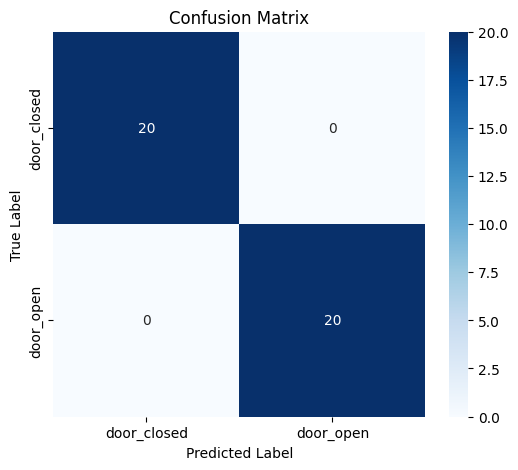

Model evaluation complete: accuracy, classification report, and confusion matrix generated.


In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Generating predictions on the validation set...")
# Make predictions on the validation set
y_pred_proba = model.predict(X_val)
y_pred = (y_pred_proba > 0.5).astype(int)

print("Classification Report:")
# Generate and print the classification report
print(classification_report(y_val, y_pred, target_names=['door_closed', 'door_open']))

print("\nConfusion Matrix:")
# Generate and print the confusion matrix
cm = confusion_matrix(y_val, y_pred)
print(cm)

# Plot the confusion matrix for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['door_closed', 'door_open'],
            yticklabels=['door_closed', 'door_open'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("Model evaluation complete: accuracy, classification report, and confusion matrix generated.")

## Visualize Convolutions

### Subtask:
Select a sample input image from the validation set (one 'door_closed' image) and visualize the feature maps (outputs) of the convolutional layers within the trained CNN model. This will provide insights into what visual patterns and features the model has learned at different stages of processing the image. The visualizations will be made smaller to fit on the screen.


**Reasoning**:
I need to explicitly define `activation_model` using the model's input and the outputs of the convolutional layers to extract and visualize the feature maps for a single 'door_closed' image from the validation set, displaying a subset of these maps for each layer in a concise grid.



Visualizing convolutions for a sample 'door_closed' image...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step

Visualizing feature maps for layer: conv2d


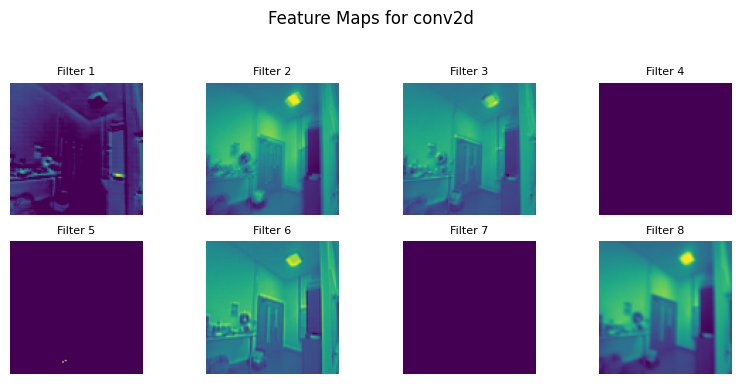


Visualizing feature maps for layer: conv2d_1


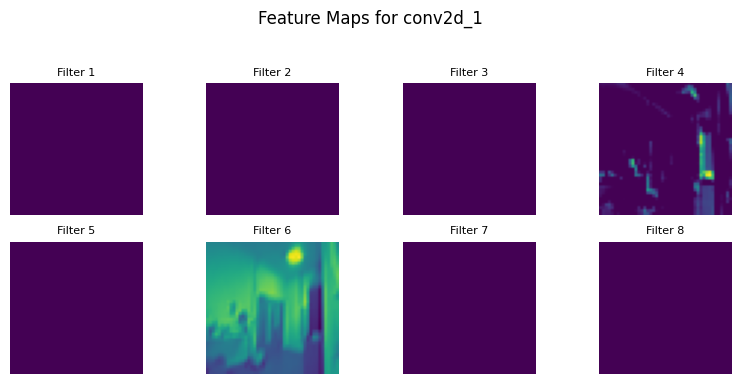

Feature map visualization complete.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

print("Visualizing convolutions for a sample 'door_closed' image...")

# 1. Select a single 'door_closed' image from the X_val dataset
# Find the index of the first 'door_closed' image (label 0) in y_val
closed_image_index = np.where(y_val == 0)[0]

if len(closed_image_index) > 0:
    sample_image_closed = X_val[closed_image_index[0]]

    # 2. Expand the dimensions of the selected image to create a batch of 1
    input_image_for_model = np.expand_dims(sample_image_closed, axis=0)

    # Ensure the model is built before accessing layers and outputs
    # This is often true after model.fit(), but good to check.
    if not model.built:
        model.build(input_shape=(None, 96, 96, 3))
        print("Model explicitly built.")

    # 3. Create a new Keras Model instance that takes the original model's input
    # and outputs the activations of the convolutional layers.
    # Identify convolutional layers by checking 'conv2d' in their name.
    layer_outputs = [layer.output for layer in model.layers if 'conv2d' in layer.name.lower()]

    # Use model.layers[0].input to explicitly get the input tensor from the Input layer
    activation_model = Model(inputs=model.layers[0].input, outputs=layer_outputs)

    # 4. Use the new activation_model to predict the feature maps for the selected image.
    feature_maps = activation_model.predict(input_image_for_model)

    # Get the names of the convolutional layers for printing
    conv_layer_names = [layer.name for layer in model.layers if 'conv2d' in layer.name.lower()]

    # 5. Iterate through the feature maps for each convolutional layer and plot them.
    for layer_name, feature_map in zip(conv_layer_names, feature_maps):
        print(f"\nVisualizing feature maps for layer: {layer_name}")

        n_features = feature_map.shape[-1] # Number of filters in the layer
        size = feature_map.shape[1]      # Size of the feature map (e.g., 94x94, 46x46)

        # Determine a suitable number of filters to display (e.g., first 8)
        display_grid_cols = 4
        display_grid_rows = int(np.ceil(min(n_features, 8) / display_grid_cols))

        plt.figure(figsize=(display_grid_cols * 2, display_grid_rows * 2))
        for i in range(min(n_features, 8)): # Display up to 8 filters
            ax = plt.subplot(display_grid_rows, display_grid_cols, i + 1)
            plt.imshow(feature_map[0, :, :, i], cmap='viridis')
            plt.title(f"Filter {i + 1}", fontsize=8)
            plt.axis('off')
        plt.suptitle(f'Feature Maps for {layer_name}', fontsize=12)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
        plt.show()
else:
    print("No 'door_closed' images found in the validation set to visualize.")

print("Feature map visualization complete.")

## Evaluate Model Performance

### Subtask:
Plot the training and validation accuracy and loss over epochs to visualize the model's learning process.


**Reasoning**:
To visualize the model's learning process, I will extract the training history (accuracy and loss) and plot them against epochs using matplotlib.



Plotting training and validation accuracy and loss...


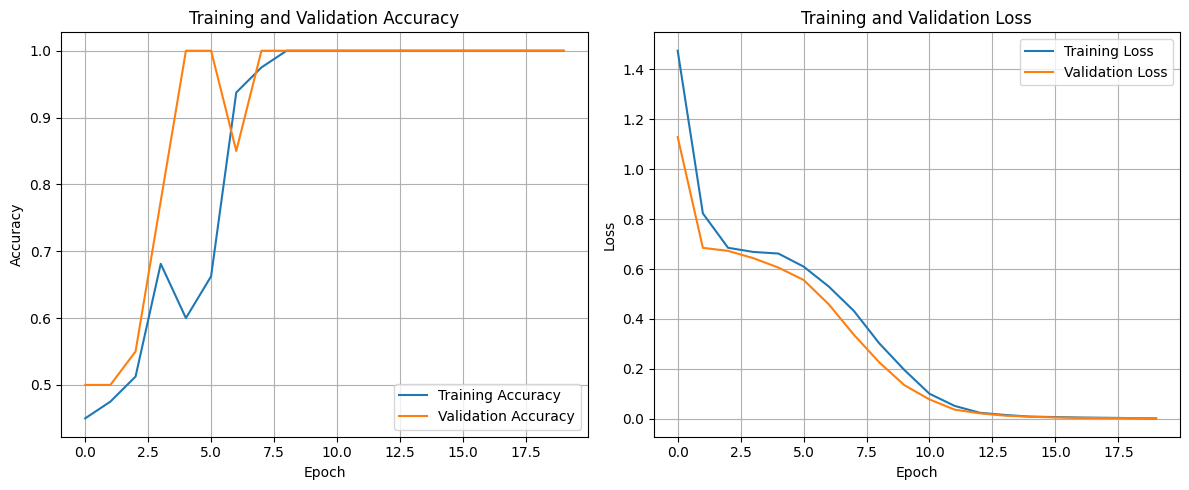

Training and validation metrics plotted successfully.


In [8]:
import matplotlib.pyplot as plt

print("Plotting training and validation accuracy and loss...")

# 1. Extract accuracy and loss from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# 2. Create a figure with two subplots
plt.figure(figsize=(12, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Training and validation metrics plotted successfully.")

# Task
Convert the trained Keras CNN model into an aggressively quantized Integer (INT8) TensorFlow Lite (.tflite) format, defining a `representative_dataset` for calibration, configuring the `TFLiteConverter` for INT8 input/output, and saving the resulting `.tflite` model. Finally, print the size of the converted model to confirm the reduction.

## Convert Model to TensorFlow Lite (INT8 Quantized)

### Subtask:
Convert the trained Keras CNN model into an aggressively quantized Integer (INT8) TensorFlow Lite (.tflite) format, defining a `representative_dataset` for calibration, configuring the `TFLiteConverter` for INT8 input/output, and saving the resulting `.tflite` model. The size of the converted model will be printed to confirm the reduction.


In [11]:
import tensorflow as tf
import os
import numpy as np

print("Starting TensorFlow Lite model conversion (INT8 quantized)...")

# 1. Define a generator function for the representative dataset
def representative_dataset():
    # Use a small subset of the training data for calibration
    # It's important to use the original X_train data before any reshaping for model input
    # Take, for example, the first 100 samples or fewer if X_train is smaller
    num_calibration_samples = min(100, X_train.shape[0])
    for i in range(num_calibration_samples):
        # Ensure the data is in the expected float32 format and correct shape
        # Add a batch dimension to the image (from (96, 96, 3) to (1, 96, 96, 3))
        image_with_batch_dim = np.expand_dims(X_train[i], axis=0)
        yield [tf.constant(image_with_batch_dim, dtype=tf.float32)]

# 2. Create a TFLiteConverter object from the trained Keras model
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# 3. Configure the converter for full integer quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

# 4. Convert the model
print("Converting model to TFLite INT8...")
tflite_model = converter.convert()
print("Model converted successfully.")

# 5. Save the tflite_model to a file
quantized_model_path = 'model_quantized.tflite'
with tf.io.gfile.GFile(quantized_model_path, 'wb') as f:
    f.write(tflite_model)
print(f"Quantized TFLite model saved to: {quantized_model_path}")

# 6. Calculate the size of the original Keras model
# Save the original model temporarily to get its size
original_model_path = 'original_keras_model.h5'
model.save(original_model_path)
original_model_size = os.path.getsize(original_model_path) / 1024 # in KB
print(f"Original Keras model size: {original_model_size:.2f} KB")

# 7. Calculate the size of the converted TFLite model
quantized_model_size = os.path.getsize(quantized_model_path) / 1024 # in KB
print(f"Quantized TFLite model size: {quantized_model_size:.2f} KB")

# Clean up the temporarily saved original model
os.remove(original_model_path)

print("TensorFlow Lite model conversion and size comparison complete.")

Starting TensorFlow Lite model conversion (INT8 quantized)...
Converting model to TFLite INT8...
Saved artifact at '/tmp/tmptsfbu9ox'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  132992285878864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132992285880016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132992285878672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132992285877328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132992285879440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132992285879056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132992285880400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132992285879632: TensorSpec(shape=(), dtype=tf.resource, name=None)


/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/convert.py:854: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


Model converted successfully.
Quantized TFLite model saved to: model_quantized.tflite
Original Keras model size: 46732.59 KB
Quantized TFLite model size: 3900.88 KB
TensorFlow Lite model conversion and size comparison complete.
